In [100]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit 
import numpy as np

In [101]:
df = pd.read_csv('C:\\Users\\dsadm\\Desktop\\ia bigdata 2\\IA_BIG_DATA\\dados_produtos.csv',sep=',')#importaçao dos dados

In [102]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [103]:
df.info()#verificar se há dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [104]:
n_product = df['product_name'].count()
print(n_product)#contagem de produtos

100


In [105]:
df.describe

<bound method NDFrame.describe of    product_name  rating  rating_count  purchased
0     Televisão    3.04            29          1
1       Celular    3.46          3872          0
2     Cafeteira    3.25          1187          0
3     Televisão    3.77          4097          1
4     Videogame    5.00          4738          1
..          ...     ...           ...        ...
95         iPod    4.44          1372          0
96      Celular    4.66          1690          1
97    Televisão    4.33          3364          1
98     Notebook    3.30          1825          1
99         iPod    4.08           533          0

[100 rows x 4 columns]>

In [106]:
import seaborn as sns

Text(0, 0.5, 'rating')

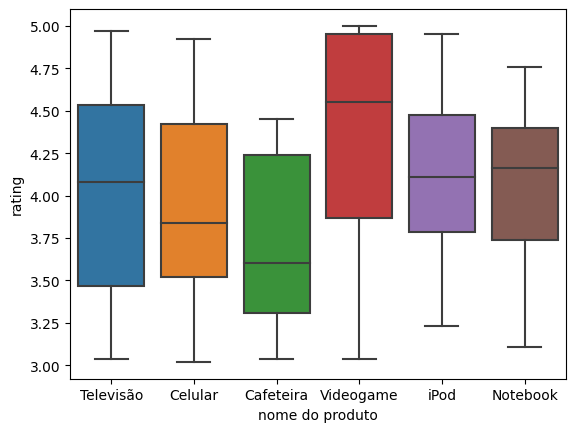

In [107]:
sns.boxplot(x = df['product_name'], y=df['rating'])#criar o boxplot
plt.xlabel('nome do produto')
plt.ylabel('rating')

In [108]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [1]:
rating = np.array([df[['rating','rating_count']]])#define como array para aceitar o reshape
televisao =np.array([df['Televisão']])
print(rating)
print(televisao)

NameError: name 'np' is not defined

In [110]:
produto_treino, produto_test, rating_train, rating_test = model_selection.train_test_split(rating.reshape(-1,1),product.reshape(-1,1), test_size=0.2, random_state = 42)#divisao dos dados

ValueError: Found input variables with inconsistent numbers of samples: [200, 100]

In [ ]:
modelo = DecisionTreeClassifier()
modelo.fit(rating_train,produto_treino)

DecisionTreeClassifier()

In [ ]:
previsoes = modelo.predict(rating_test)

In [ ]:
print(previsoes)

['Notebook' 'Televisão' 'Celular' 'Videogame' 'Videogame' 'Cafeteira'
 'Televisão' 'Notebook' 'Celular' 'Cafeteira' 'Notebook' 'Cafeteira'
 'Cafeteira' 'iPod' 'Celular' 'Videogame' 'Celular' 'Celular' 'Celular'
 'iPod']


In [ ]:
acuracy = accuracy_score(produto_test,previsoes)
print(acuracy)

0.25


In [ ]:
purchased = df['purchased'] 

In [ ]:
print(purchased)

0         comprou
1     não comprou
2     não comprou
3         comprou
4         comprou
         ...     
95    não comprou
96        comprou
97        comprou
98        comprou
99    não comprou
Name: purchased, Length: 100, dtype: object


In [ ]:
df['purchased']= df['purchased'].map({1:'comprou',0:'não comprou'})

[Text(0.2849147121535181, 0.9736842105263158, '[[3.04, 29.0], [3.46, 3872.0], [3.25, 1187.0], [3.77, 4097.0], [5.0, 4738.0], [3.98, 1413.0], [3.5, 1907.0], [4.76, 3857.0], [3.94, 2800.0], [4.68, 2600.0], [4.43, 2748.0], [3.14, 4599.0], [4.42, 79.0], [3.14, 1428.0], [3.62, 4399.0], [4.1, 4977.0], [3.93, 3745.0], [4.61, 4801.0], [4.18, 1425.0], [3.11, 4620.0], [4.24, 1744.0], [4.95, 1879.0], [4.49, 230.0], [3.6, 4841.0], [4.92, 3679.0], [3.12, 3649.0], [4.89, 2773.0], [3.76, 4965.0], [3.76, 4780.0], [4.94, 3070.0], [3.02, 2544.0], [4.12, 1946.0], [3.23, 1992.0], [4.45, 4236.0], [4.08, 4613.0], [4.0, 245.0], [3.31, 556.0], [3.04, 4403.0], [4.8, 3376.0], [4.31, 1786.0], [3.82, 2357.0], [3.45, 3299.0], [3.05, 3162.0], [3.69, 2385.0], [3.45, 2895.0], [4.98, 4566.0], [4.96, 950.0], [3.75, 2463.0], [5.0, 2986.0], [3.39, 1489.0], [3.33, 1936.0], [4.95, 4969.0], [4.8, 3537.0], [4.24, 3065.0], [4.97, 394.0], [4.23, 1556.0], [4.68, 4333.0], [3.51, 10.0], [3.16, 4301.0], [4.99, 1779.0], [4.24, 1435

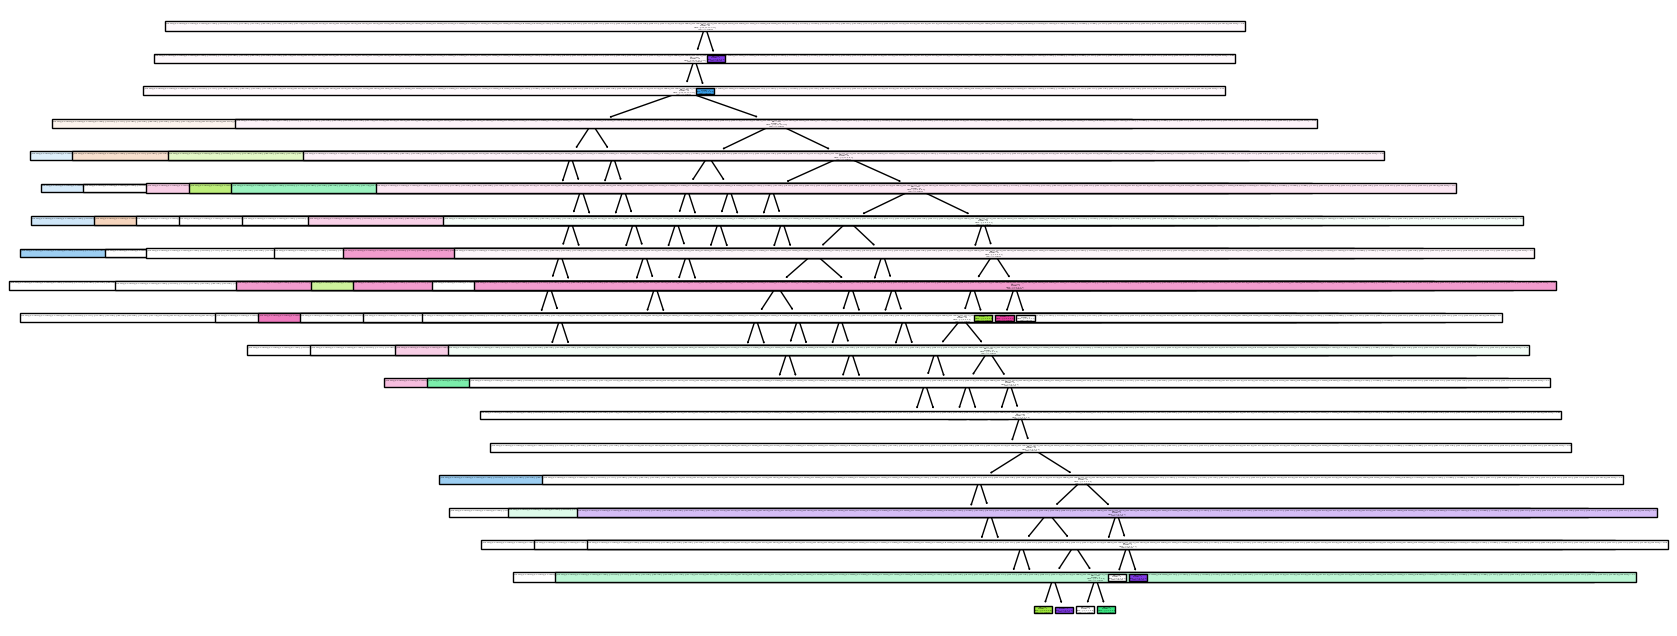

In [ ]:
fig = plt.figure(figsize=(8,8))
tree.plot_tree(modelo,feature_names= rating.tolist(), class_names = purchased.tolist(), filled= True)